In [1]:
from astropy.stats import sigma_clipped_stats
from photutils.datasets import load_star_image
hdu = load_star_image()  
data = hdu.data[0:401, 0:401]  
mean, median, std = sigma_clipped_stats(data, sigma=3.0)  
print((mean, median, std))  


(3668.09661145823, 3649.0, 204.41388592022315)


In [6]:
from photutils.detection import DAOStarFinder
daofind = DAOStarFinder(fwhm=3.0, threshold=5.*std)  
sources = daofind(data - median)  
for col in sources.colnames:
    sources[col].info.format = '%.8g'  # for consistent table output
print(sources)  

 id xcentroid ycentroid sharpness  ... sky peak    flux       mag     
--- --------- --------- ---------- ... --- ---- --------- ------------
  1 144.24757 6.3797904 0.58156257 ...   0 6903 5.6976747   -1.8892441
  2 208.66907 6.8205805 0.48348966 ...   0 7896 6.7186388   -2.0682032
  3 216.92614 6.5775933 0.69359525 ...   0 2195 1.6662764  -0.55436758
  4 351.62519 8.5459013 0.48577834 ...   0 6977 5.8970385   -1.9265849
  5 377.51991 12.065501 0.52038488 ...   0 1260 1.1178252  -0.12093477
  6 294.27284 12.737191 0.68021892 ...   0 2059 1.4809613  -0.42635928
  7 85.217728 14.710347 0.62394134 ...   0 1458 1.2457081  -0.23854075
...       ...       ...        ... ... ...  ...       ...          ...
280 351.47954 394.67972 0.64117843 ...   0 1545 1.0640811 -0.067436775
281 345.59306 395.38222   0.384078 ...   0 9350  5.052578   -1.7587826
282 267.90091 398.61991 0.27117231 ...   0 9299 5.4379278   -1.8385836
283 271.46959 398.91242 0.36738752 ...   0 8028 5.0693475   -1.7623802
284 29

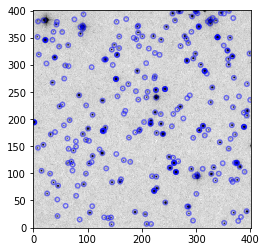

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils.aperture import CircularAperture
positions = np.transpose((sources['xcentroid'], sources['ycentroid']))
apertures = CircularAperture(positions, r=4.)
norm = ImageNormalize(stretch=SqrtStretch())
plt.imshow(data, cmap='Greys', origin='lower', norm=norm,
            interpolation='nearest')
apertures.plot(color='blue', lw=1.5, alpha=0.5)

In [8]:
from astropy.stats import sigma_clipped_stats
from photutils.datasets import make_100gaussians_image
from photutils.detection import find_peaks
data = make_100gaussians_image()
mean, median, std = sigma_clipped_stats(data, sigma=3.0)
threshold = median + (5. * std)
tbl = find_peaks(data, threshold, box_size=11)
tbl['peak_value'].info.format = '%.8g'  # for consistent table output
print(tbl[:10])  # print only the first 10 peaks

x_peak y_peak peak_value
------ ------ ----------
   233      0  27.477852
   493      6  20.404769
   207     11  24.075798
   258     12  17.395025
   366     12  18.729726
   289     22  35.853276
   380     29  19.261986
   442     31  30.239994
   359     36  19.771626
   471     38   25.45583


(0.0, 299.0)

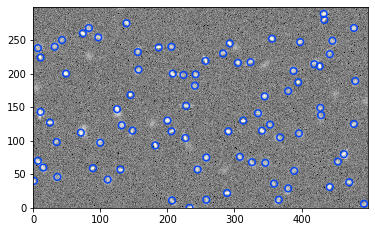

In [9]:
import numpy as np
>>> import matplotlib.pyplot as plt
>>> from astropy.visualization import simple_norm
>>> from astropy.visualization.mpl_normalize import ImageNormalize
>>> from photutils.aperture import CircularAperture
>>> positions = np.transpose((tbl['x_peak'], tbl['y_peak']))
>>> apertures = CircularAperture(positions, r=5.)
>>> norm = simple_norm(data, 'sqrt', percent=99.9)
>>> plt.imshow(data, cmap='Greys_r', origin='lower', norm=norm,
...            interpolation='nearest')
>>> apertures.plot(color='#0547f9', lw=1.5)
>>> plt.xlim(0, data.shape[1] - 1)
>>> plt.ylim(0, data.shape[0] - 1)